### Importamos las librerias


In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import math as mt
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Cargamos los datos preprocesados, lo procesamos y los Visualizamos

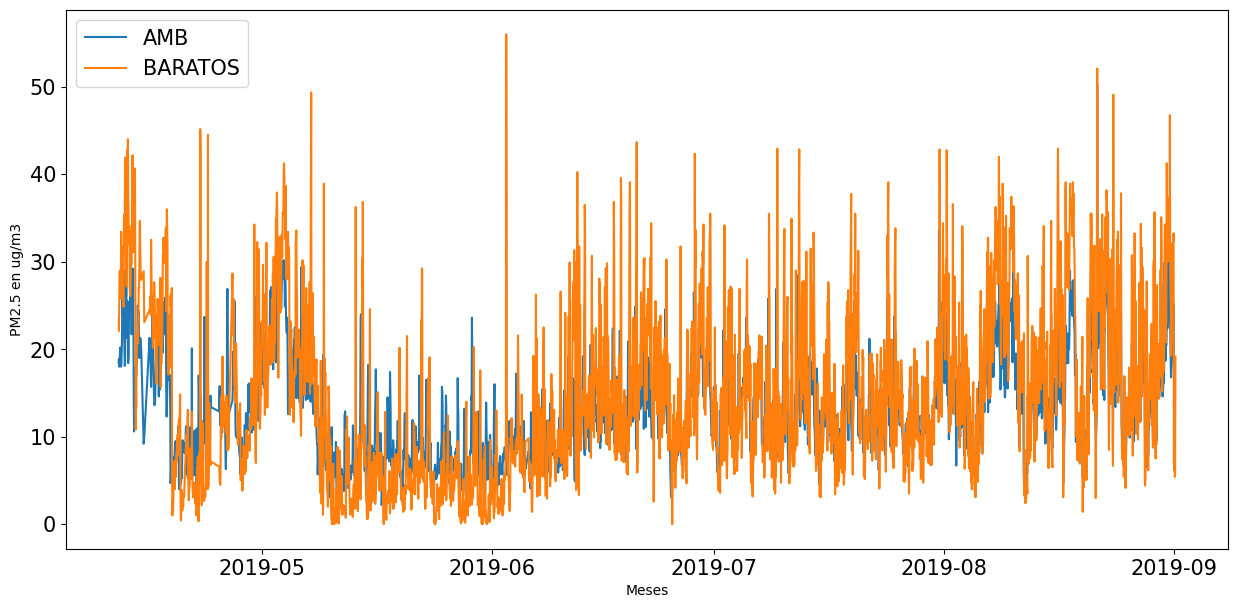

,Fechas,Medidas
0,2019-04-11 17:00:00,18.5
1,2019-04-11 18:00:00,18.9
2,2019-04-11 19:00:00,18.0
3,2019-04-11 20:00:00,18.4
4,2019-04-11 21:00:00,19.3
...,...,...
3322,2019-08-31 19:00:00,20.4
3323,2019-08-31 20:00:00,18.7
3324,2019-08-31 21:00:00,22.8
3325,2019-08-31 22:00:00,25.2


In [117]:
data = pd.read_excel('Datos AMB.xlsx')
data1 = pd.read_csv('Datos Baratos.csv',sep=",",parse_dates=['fecha_hora_med'])
DataAMB_CORREGIDO = pd.read_excel('Datos AMB2.xlsx')

# Limpieza de datos
data1 = data1.drop(['id_parametro'], axis =1)
data['Medidas'] = data['Medidas'].replace('NoData', '')
data = data.dropna()
data1 = data1.dropna()

# Sincronizacion de fechas
#DataAMB_CORREGIDO['Diferencias de horas'] = data1['fecha_hora_med'] - DataAMB_CORREGIDO['Fechas']
#data1['fecha_hora_med'] = data1['fecha_hora_med'] - DataAMB_CORREGIDO['Diferencias de horas']

data1['fecha_hora_med']     = pd.to_datetime(data1['fecha_hora_med'])
data['Fechas']              = pd.to_datetime(data['Fechas'])
DataAMB_CORREGIDO['Fechas'] = pd.to_datetime(DataAMB_CORREGIDO['Fechas'])

data1 = data1.sort_values('fecha_hora_med',ascending=True)

data = data.drop_duplicates()
data1 = data1.drop_duplicates()
# Plot
plt.figure(figsize=(15,7))

DATOS_AMB = plt.plot(DataAMB_CORREGIDO['Fechas'], DataAMB_CORREGIDO['Medidas'], label='AMB')
DATOS_BAJA_CALIDAD = plt.plot(data1['fecha_hora_med'], data1['valor'], label='BARATOS')
plt.xlabel('Meses')
plt.ylabel('PM2.5 en ug/m3')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
DataAMB_CORREGIDO

# Promedio movil con varios tipos de configuraciones

#### Promedio con la ventana = 3 y con los pasos = 1

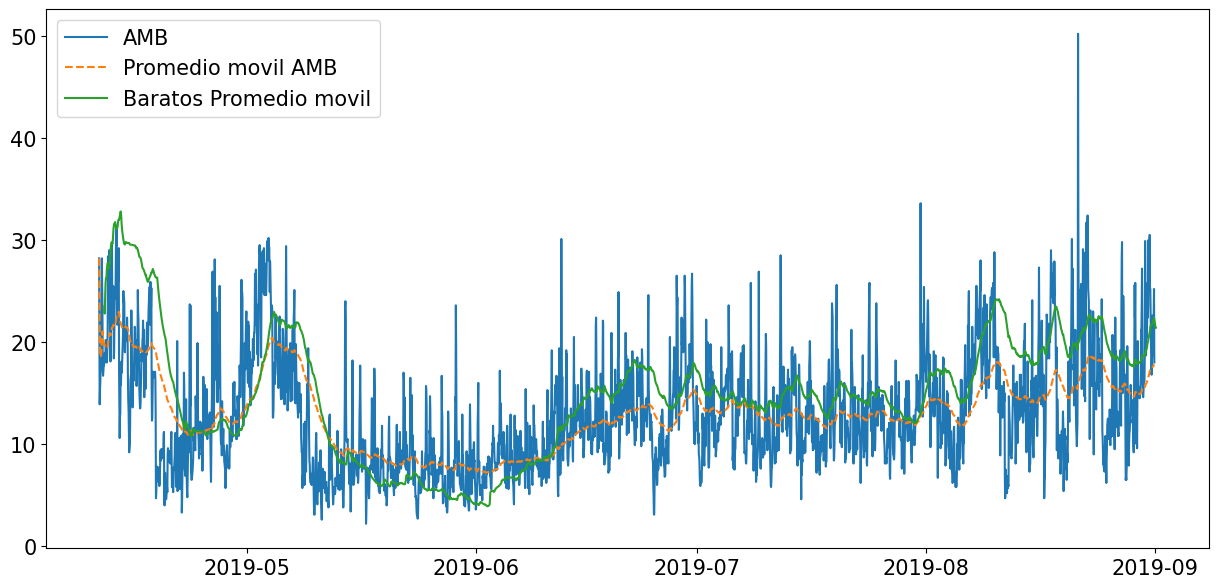

,fecha_hora_med,valor,moving average_3
396,2019-04-11 17:29:20.949,23.500000,23.500000
395,2019-04-11 18:02:49.625,22.083334,22.787240
394,2019-04-11 19:02:50.638,25.250000,23.618443
393,2019-04-11 20:03:00.961,28.749998,24.925485
392,2019-04-11 21:02:49.634,29.000000,25.760887
...,...,...,...
2606,2019-09-01 00:02:50.912,6.166667,22.002574
2605,2019-09-01 01:02:49.911,7.833333,21.826559
2604,2019-09-01 02:02:49.912,5.416667,21.622709
2603,2019-09-01 03:02:49.912,5.750000,21.425532


In [118]:
color = ['limegreen', '#bc15b0', 'indigo']
linestyle = ['-','--','-.']
plt.figure(figsize=(15,7))

#Promedio movil con la ventana = 3 y con el paso = 1
data1['moving average_3'] = data1['valor'].ewm(span = 160).mean()
data['moving average_3'] = data['Medidas'].ewm(span =160).mean()
DataAMB_CORREGIDO['moving average_3'] = DataAMB_CORREGIDO['Medidas'].ewm(span =160).mean()
DataAMB_CORREGIDO['Baratas'] = data1['valor']
plt.plot(data['Fechas'], data['Medidas'], label='AMB')
PROMEDIO_MOVIL = plt.plot(data['Fechas'], data['moving average_3'], '--',label='Promedio movil AMB')
plt.plot(data1['fecha_hora_med'], data1['moving average_3'], label='Baratos Promedio movil')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


# Prediccion y calibracion de las medidas

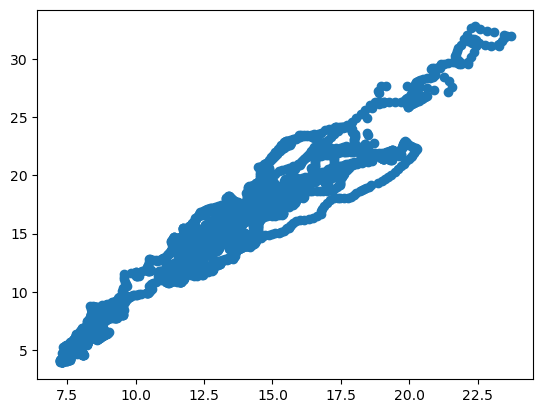

C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_12096\3879603789.py:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_features,train_labels);
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Mean Absolute Error: 6.478902901188307
Accuracy: 41.898105446114585
RMSE: 8.186642190830003


In [119]:
#Funcion de calibracion
data_copy = data.copy()
data_copy = data[(data['Fechas'] <= ('2019-08-27 20:00:00'))]
DataAMB_CORREGIDO = DataAMB_CORREGIDO[(DataAMB_CORREGIDO['Fechas'] <= ('2019-08-31 23:00:00'))]
data1 = data1[(data1['fecha_hora_med'] <= ('2019-08-31 08:00:00'))]

data_copy = data_copy.dropna()
data = data.dropna()
data1 = data1.dropna()
DataAMB_CORREGIDO = DataAMB_CORREGIDO.dropna()

Y = data1['moving average_3'].values.reshape(-1, 1)
X = DataAMB_CORREGIDO['moving average_3'].values.reshape(-1, 1)

plt.scatter(DataAMB_CORREGIDO['moving average_3'],  data1['moving average_3'])

plt.show()


def euclidean(ref,exp):
    sd = (DataAMB_CORREGIDO[ref]-DataAMB_CORREGIDO[exp])**2
    distance = np.sqrt(sd.sum())
    return distance

#Distancia euclideana
e0 = euclidean("Medidas","Baratas")
e0


# Carga de librerías
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder 
from numpy.core.umath_tests import inner1d



train_features,test_features,train_labels,test_labels=train_test_split(X,Y,test_size=0.5,random_state=0)
# Instantiate model with 1000 decision trees
rf=RandomForestRegressor(n_estimators=1000,random_state=0,max_features="sqrt",criterion="mse")
# Train the model on training data
rf.fit(train_features,train_labels);
# Use the forest's predict method on the test data
predictions=rf.predict(test_features)
# Calculate the absolute errors
errors=abs(predictions-test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))
# Calculate mean absolute percentage error (MAPE)
mape=100*abs(errors/test_labels)
rmse=np.sqrt(np.mean(errors**2))
# Calculate and display accuracy
accuracy=100-np.mean(mape)
print('Accuracy:', accuracy)
print('RMSE:', rmse)



In [120]:
#Distancia de las medidas


ErrorCuadraticoMedio =  ((((DataAMB_CORREGIDO['Medidas'] - rf.predict(X))**2).mean()))

distancia_AMB_BARATAS = mt.sqrt((((DataAMB_CORREGIDO['Medidas'] - DataAMB_CORREGIDO['Baratas'])**2)).sum())

distancias_ventanas_moviles =  mt.sqrt((((DataAMB_CORREGIDO['moving average_3'] - data1['moving average_3'])**2)).sum())

Distancia_AMB_con_Barata_Calibrados = mt.sqrt((((DataAMB_CORREGIDO['moving average_3'] - rf.predict(X))**2)).sum())

Distancia_AMB_con_Barata_Calibrados

171.55303920534115

In [121]:
distancia_AMB_BARATAS

636.9990763768072

In [122]:
ErrorCuadraticoMedio

30.79785855034078

In [123]:
distancias_ventanas_moviles

417.3928997382749

## Graficas comprando los datos sin calibrar con los calobrados y su error

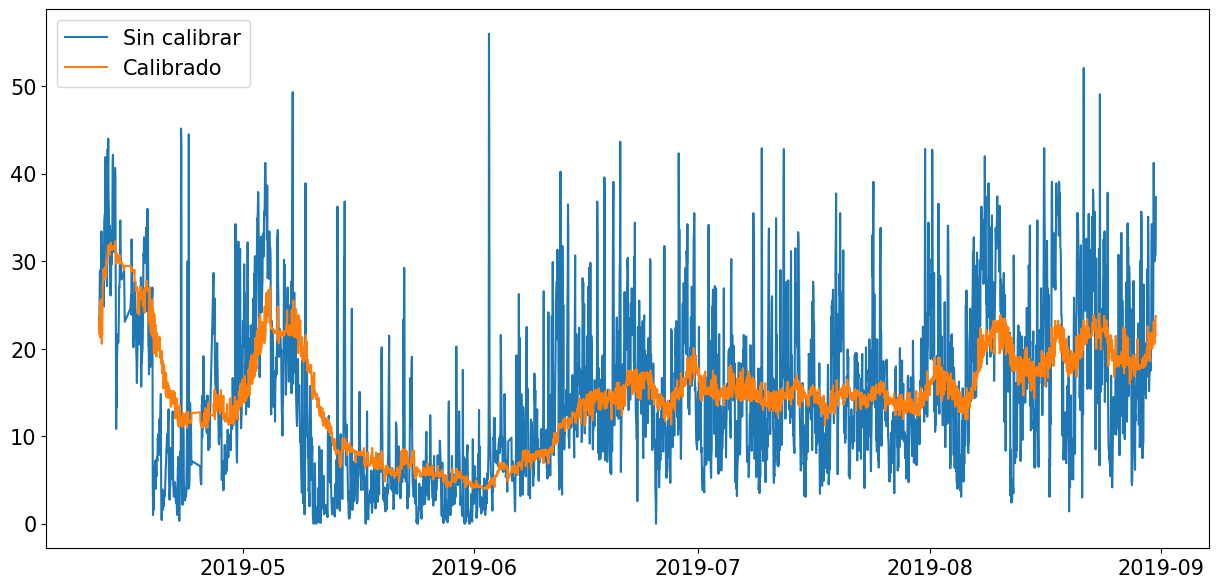

In [124]:
plt.figure(figsize=(15,7))
plt.plot(data1['fecha_hora_med'], data1['valor'], label='Sin calibrar')
plt.plot(data1['fecha_hora_med'],rf.predict(X), label='Calibrado')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

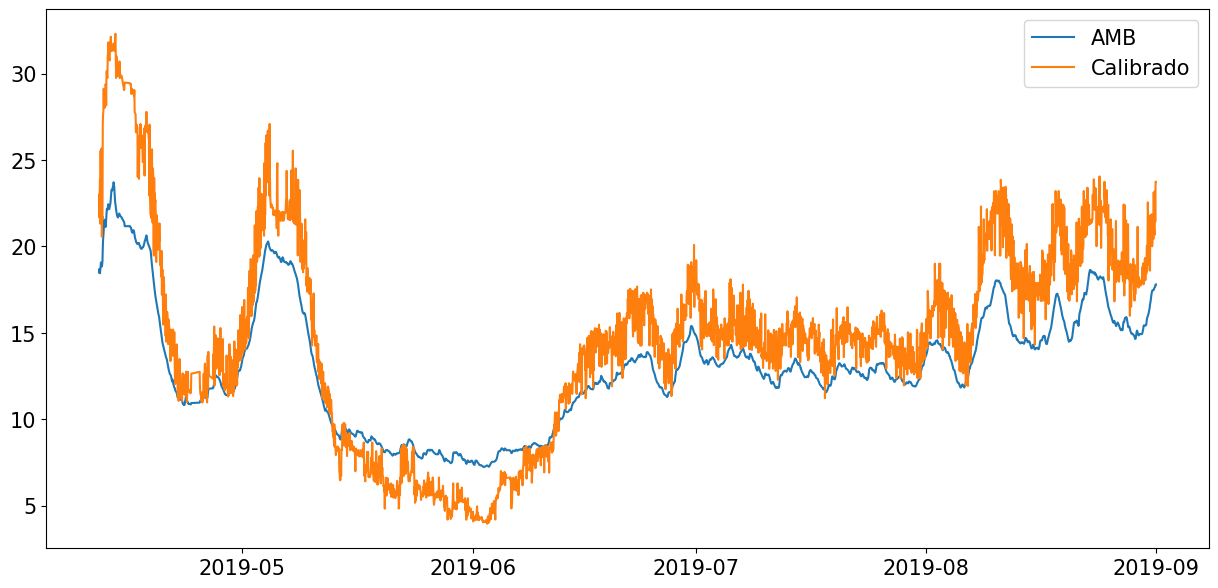

In [127]:
plt.figure(figsize=(15,7))
plt.plot(DataAMB_CORREGIDO['Fechas'], DataAMB_CORREGIDO['moving average_3'], label='AMB')
plt.plot(DataAMB_CORREGIDO['Fechas'], rf.predict(X), label='Calibrado')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
